In [1]:
# adding ignore warning to clean the code
import warnings
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import colorcet as cc
from typing import Union

# Ignore all warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import discotoolkit as dt

In [2]:
all_atlas = dt.get_atlas()

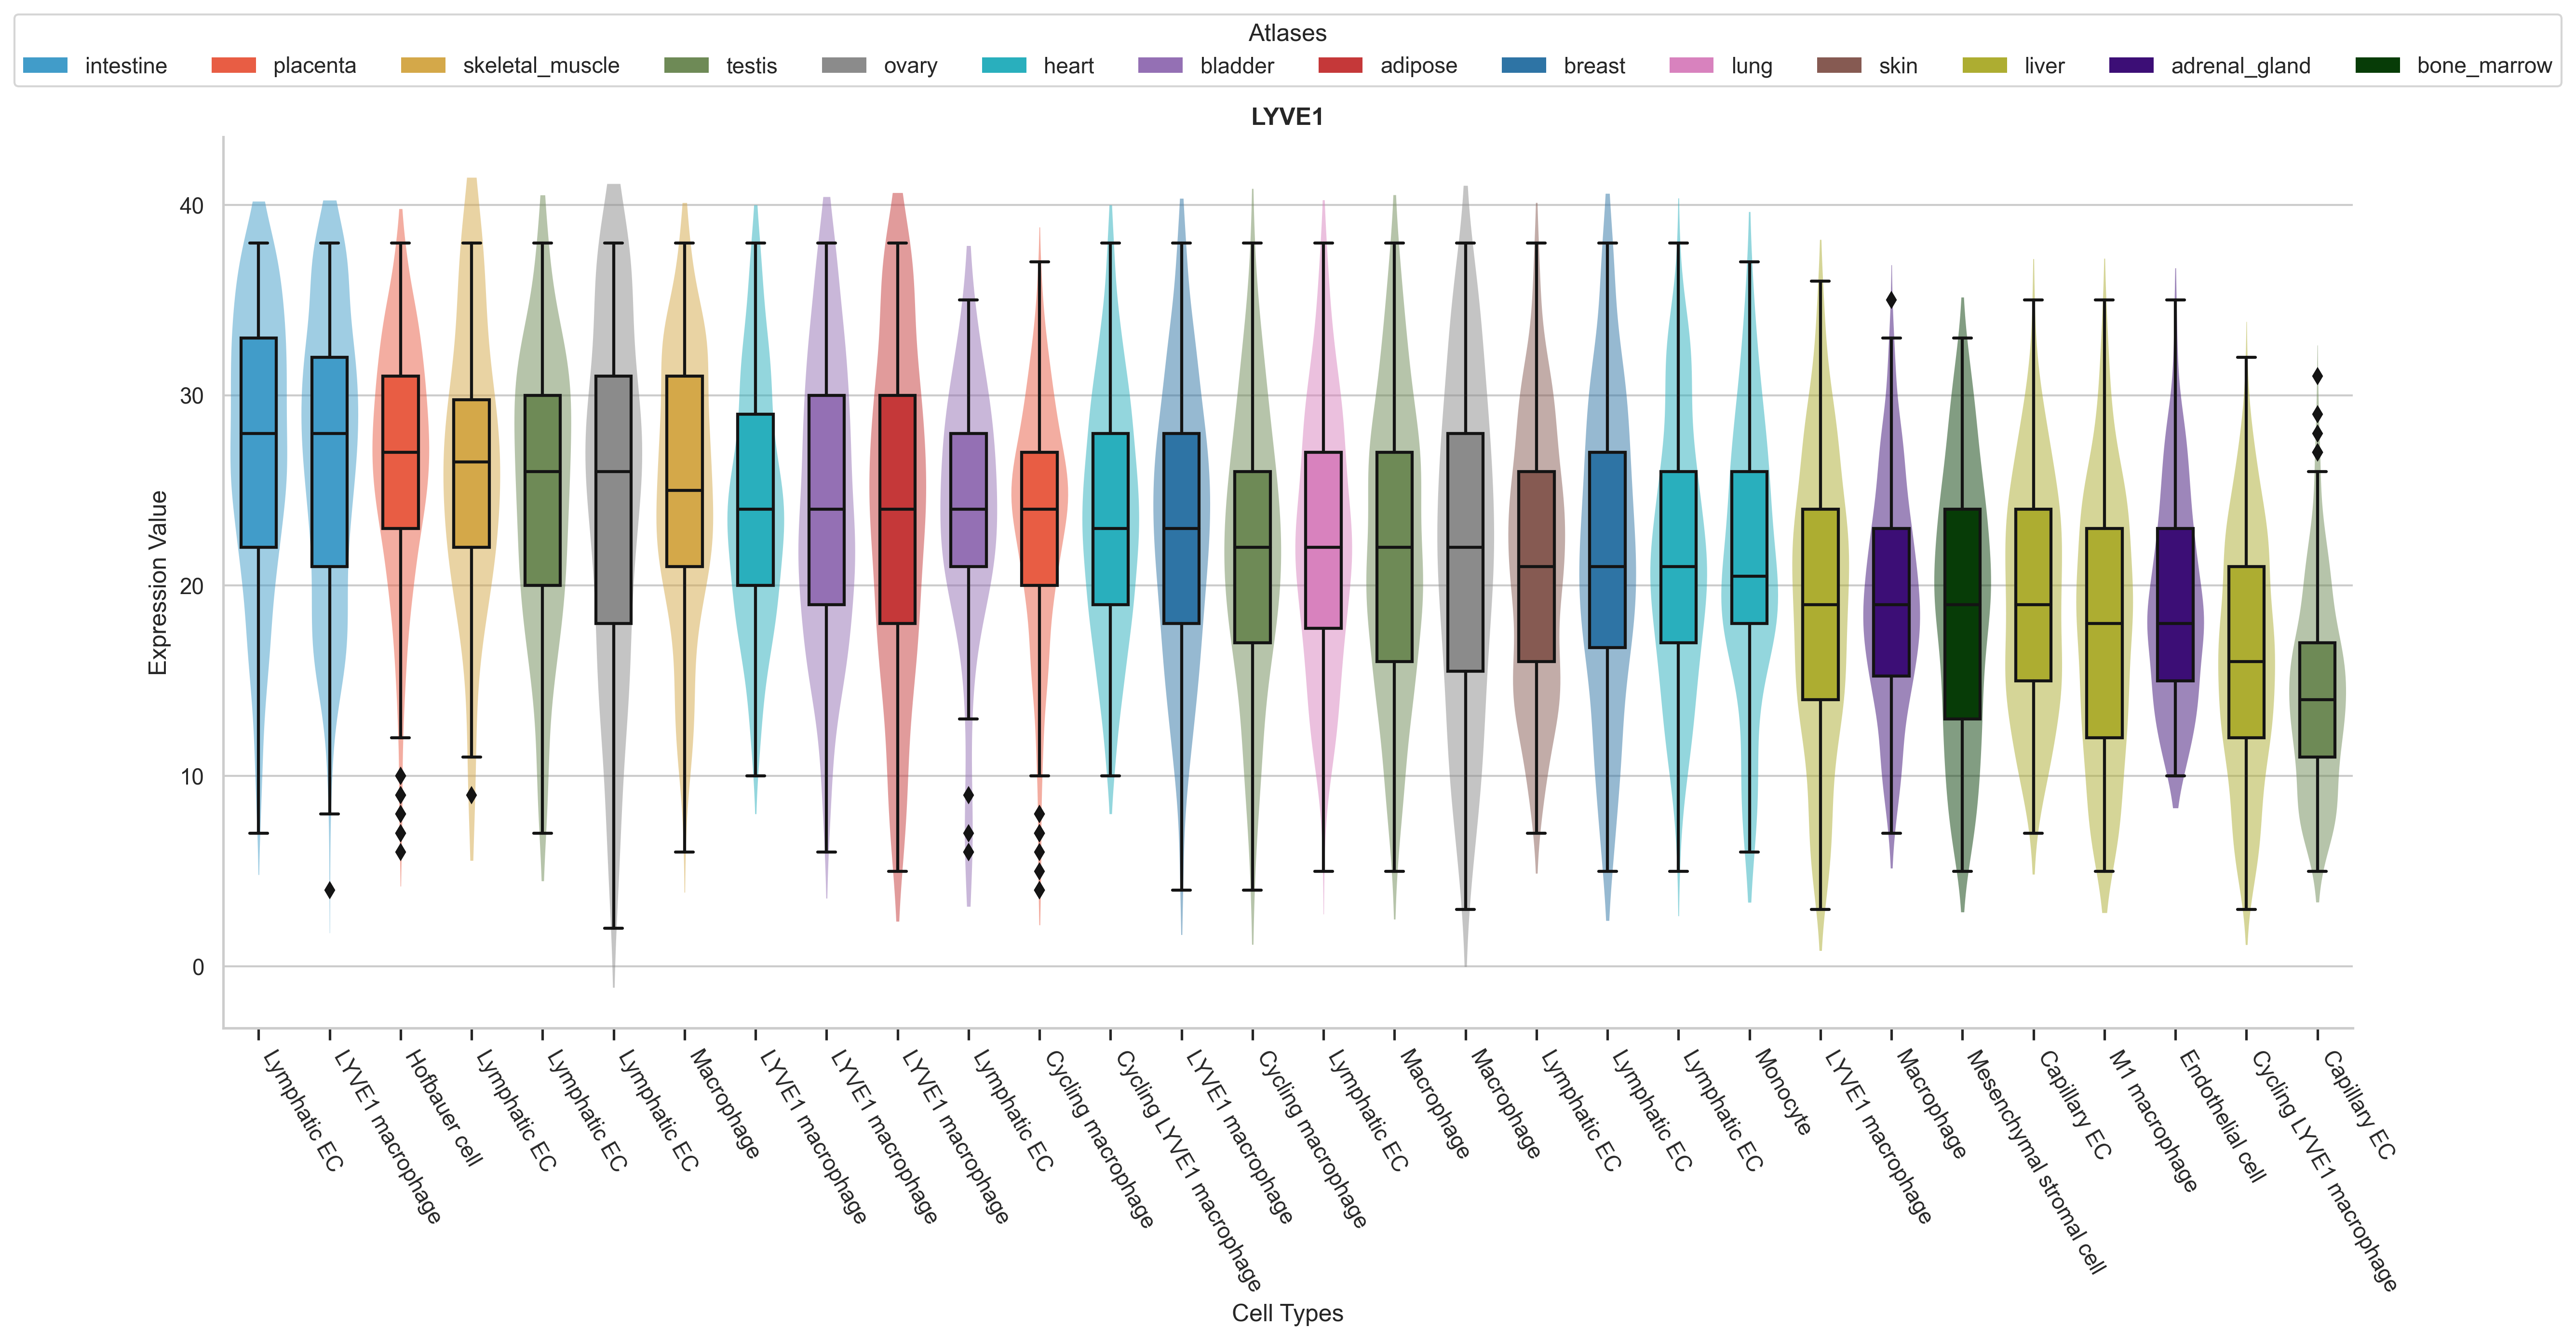

In [3]:
dt.gene_search("LYVE1", atlas = all_atlas)